<a href="https://colab.research.google.com/github/Hab-eeb/Data_Science_practice/blob/master/regularization%20with%20dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
%matplotlib inline

Importing of the MNIST dataset 

In [151]:
 mnist_K = keras.datasets.mnist 
 (train_images,train_labels),(test_images,test_labels) = mnist_K.load_data() 

train_image =train_images
train_label = train_labels
test_image = test_images
test_label = test_labels


Mounted google drive and checked the contents so i can save my model for later use or refrence

In [49]:
!ls "/content/drive/My Drive/Colab Notebooks"

 checkpoint			    save.data-00000-of-00001
'Copy of for_the_people.ipynb'	    save.index
'Copy of save_and_load.ipynb'	    saves
'Copy of saved_model.ipynb'	    saves.data-00000-of-00001
'Copy of TensorPrac.ipynb'	    saves.index
'Copy of Welcome To Colaboratory'   StageD_Lesson1.ipynb
 Lesson_2.ipynb			    TensorPrac.ipynb


In [53]:
!ls "/content/drive/My Drive/Colab Notebooks/saves"

checkpoint  stageD1_keras.data-00000-of-00001  stageD1_keras.index


In [8]:
train_image.shape

(60000, 28, 28)

Reshaping the dataset from a 28x28 matrix to 2d array for easy training

In [152]:
train_images_2d = train_image.reshape(-1,28*28) 
test_images_2d =test_image.reshape(-1,28*28) 

In [21]:
train_images_2d.shape

(60000, 784)

In [12]:
train_labels.shape

(60000,)

Scaling the images to 0-1, dividing by 255 because the features range from 0 -255

In [153]:
train_images_2d = train_images_2d / 255 
test_image = test_images_2d / 255 

Splitting the training set furher into train and validation sets

In [154]:
image_train, image_val = train_images_2d[:50000],train_images_2d[50000:]
label_train, label_val = train_label[:50000],train_label[50000:]

In [15]:
image_train.shape

(50000, 784)

In [16]:
label_val.shape

(10000,)

one hot encode the labels to help the model learn better


In [162]:
from keras.utils import to_categorical
nos_label = 10
label_train = to_categorical(label_train,nos_label)
label_val =to_categorical(label_val,nos_label)
test_label =to_categorical(test_label,nos_label)

In [136]:
test_label.shape

(10000, 10)

In [137]:
label_val.shape

(10000, 10)

Importing the components to build a sequential model

In [24]:
from keras.layers import Dense 
from keras.models import Sequential


In [168]:
model = Sequential()

model.add(Dense(256, activation='relu' ,input_shape = (image_train.shape[1],)))
model.add(Dense(128,activation="relu"))
model.add(Dense(nos_label, activation='softmax'))

model.compile(optimizer='adam',loss = 'categorical_crossentropy' , metrics=['accuracy'])

#creating a checkpoint to save the weights to my google drive
checkpoint_path = "/content/drive/My Drive/Colab Notebooks/saves/stageD1_keras/as.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,save_weights_only=True, verbose=2)
norm_model = model.fit(image_train,label_train, validation_data=(image_val,label_val), epochs=20, callbacks=[cp_callback] ,batch_size=1000)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.6822 - acc: 0.8158
Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/saves/stageD1_keras
50000/50000 [==============================] - 3s 58us/sample - loss: 0.6746 - acc: 0.8179 - val_loss: 0.2542 - val_acc: 0.9273
Epoch 2/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.2376 - acc: 0.9313
Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/saves/stageD1_keras
50000/50000 [==============================] - 2s 31us/sample - loss: 0.2369 - acc: 0.9315 - val_loss: 0.1857 - val_acc: 0.9478
Epoch 3/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.1774 - acc: 0.9481
Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/saves/stageD1_keras
50000/50000 [==============================] - 2s 31us/sample - loss: 0.1767 - acc: 0.9483 - val_loss: 0.1526 - val_acc: 0.9564
Epoch 4/20
490

In [169]:
test_loss,accuracy = model.evaluate(test_image, test_label)

print('Test loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(accuracy))

Test loss: 0.07284321913531458
Test Accuracy: 0.9789999723434448


In [191]:
train_loss,t_accuracy = model.evaluate(image_train,label_train)

print('Test loss: {}'.format(train_loss))
print('Test Accuracy: {}'.format(t_accuracy))

Test loss: 0.008250757055571302
Test Accuracy: 0.9991599917411804


In [192]:
val_loss,v_accuracy = model.evaluate(image_val,label_val)

print('Test loss: {}'.format(val_loss))
print('Test Accuracy: {}'.format(v_accuracy))

Test loss: 0.07649475144575117
Test Accuracy: 0.9799000024795532


Checking the validation loss against the training loss as it reduces with respect to epochs,
As can be seen the validation isnt close to the training loss which implies overfitting

Text(0.5, 1.0, 'Loss curves before regularization')

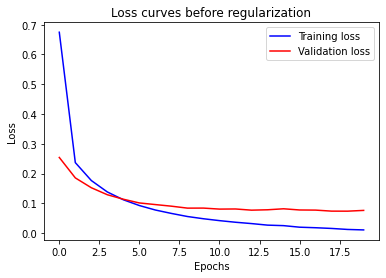

In [171]:
plt.figure()
plt.plot(norm_model.history['loss'],'blue')
plt.plot(norm_model.history['val_loss'],'red')
plt.legend(["Training loss","Validation loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curves before regularization")

Redoing using another method of initializing it but adding a regularization factor called dropout to try and reduce overfitting 

In [186]:
from keras.layers import Dropout
reg_model = Sequential(
    [
     keras.Input(shape=(image_train.shape[1],) ),
     Dense(256,activation='relu'),
     Dropout(0.4),
     Dense(128,activation='relu'),
     Dropout(0.4),
     Dense(nos_label,activation="softmax")
    ]
)

In [187]:
reg_model.compile(optimizer="adam", loss ="categorical_crossentropy", metrics=["accuracy"])
checkpoint_path2 = "/content/drive/My Drive/Colab Notebooks/saves/stageD1_keras1/as.ckpt"
checkpoint_dir2 = os.path.dirname(checkpoint_path)

cp1_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path2, save_weights_only=True,verbose=1)

reg_dropout_model = reg_model.fit(image_train,label_train,validation_data=(image_val,label_val),callbacks=[cp1_callback],epochs=20,batch_size=1000)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.9863 - acc: 0.6866
Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/saves/stageD1_keras1/as.ckpt
50000/50000 [==============================] - 3s 66us/sample - loss: 0.9759 - acc: 0.6899 - val_loss: 0.3009 - val_acc: 0.9161
Epoch 2/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.3853 - acc: 0.8867
Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/saves/stageD1_keras1/as.ckpt
50000/50000 [==============================] - 2s 36us/sample - loss: 0.3842 - acc: 0.8872 - val_loss: 0.2051 - val_acc: 0.9413
Epoch 3/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.2865 - acc: 0.9161
Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/saves/stageD1_keras1/as.ckpt
50000/50000 [==============================] - 2s 37us/sample - loss: 0.2864 - acc: 0.9165 - val_loss: 0.1660 - val

In [189]:
t,a = reg_model.evaluate(test_image, test_label)

print('Test loss: {}'.format(t))
print('Test Accuracy: {}'.format(a))

Test loss: 0.07024359134443803
Test Accuracy: 0.9800000190734863


In [81]:
test_label.shape

(10000, 10)

Text(0.5, 1.0, 'losses after regularization')

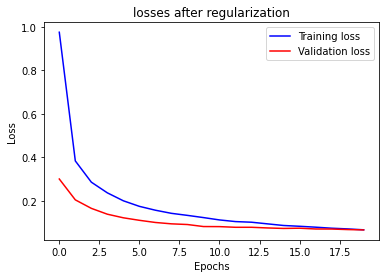

In [190]:
plt.figure()
plt.plot(reg_dropout_model.history['loss'],'blue')
plt.plot(reg_dropout_model.history["val_loss"],"red")
plt.legend(["Training loss","Validation loss"])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('losses after regularization')